In [1]:
import pandas as pd
import numpy as np

In [49]:
import matplotlib.pyplot as plt

In [178]:
df=pd.read_csv(r'E:\研究生数学建模\any-data\TORONTO-monthly-011986-052015.csv',engine='python',skiprows=18 )



In [179]:
df.columns

Index(['Date/Time', 'Year', 'Month', 'Mean Max Temp (°C)',
       'Mean Max Temp Flag', 'Mean Min Temp (°C)', 'Mean Min Temp Flag',
       'Mean Temp (°C)', 'Mean Temp Flag', 'Extr Max Temp (°C)',
       'Extr Max Temp Flag', 'Extr Min Temp (°C)', 'Extr Min Temp Flag',
       'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)',
       'Total Snow Flag', 'Total Precip (mm)', 'Total Precip Flag',
       'Snow Grnd Last Day (cm)', 'Snow Grnd Last Day Flag',
       'Dir of Max Gust (10's deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],
      dtype='object')

In [180]:
df=df[['Date/Time', 'Year', 'Month', 'Mean Min Temp (°C)', 'Mean Temp (°C)']]

In [145]:
df.isnull().sum().sort_values(ascending=False)/len(df) 

Total Rain Flag               0.988675
Total Precip Flag             0.988675
Mean Max Temp Flag            0.987542
Mean Min Temp Flag            0.986410
Mean Temp Flag                0.986410
Snow Grnd Last Day Flag       0.962627
Total Snow Flag               0.912797
Extr Max Temp Flag            0.860702
Dir of Max Gust Flag          0.851642
Spd of Max Gust Flag          0.832390
Extr Min Temp Flag            0.814270
Dir of Max Gust (10's deg)    0.345413
Spd of Max Gust (km/h)        0.336353
Snow Grnd Last Day (cm)       0.121178
Total Rain (mm)               0.009060
Extr Min Temp (掳C)            0.009060
Extr Max Temp (掳C)            0.009060
Total Precip (mm)             0.009060
Mean Temp (掳C)                0.009060
Mean Min Temp (掳C)            0.009060
Mean Max Temp (掳C)            0.009060
Total Snow (cm)               0.007928
Month                         0.000000
Year                          0.000000
Date/Time                     0.000000
dtype: float64

In [146]:
df=df.loc[:,['Date/Time','Year','Month','Total Snow (cm)','Mean Max Temp (掳C)', 'Mean Min Temp (掳C)','Mean Temp (掳C)','Total Precip (mm) ','Total Rain (mm) ']]

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [181]:
df.isnull().sum()

Date/Time             0
Year                  0
Month                 0
Mean Min Temp (°C)    0
Mean Temp (°C)        0
dtype: int64

In [86]:
df.shape

(1569, 9)

In [148]:
df=df.drop(columns=['Total Precip (mm) ','Total Rain (mm) ']).dropna()

In [110]:
df=df.loc[:,['Year','Mean Min Temp (～C)','Mean Temp (～C)']]

In [182]:
df.columns

Index(['Date/Time', 'Year', 'Month', 'Mean Min Temp (°C)', 'Mean Temp (°C)'], dtype='object')

In [183]:
df['min/mean']=df['Mean Min Temp (°C)']/df['Mean Temp (°C)']

In [184]:
data=df[df['min/mean']<=0.2]

In [188]:
ans=data['Year'].value_counts(sort=False)

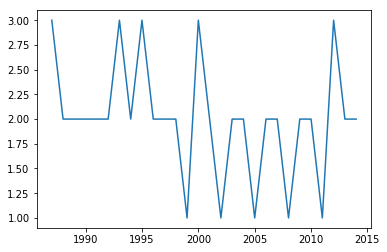

In [193]:
ans.plot(kind='')

In [166]:
import numpy as np
def s(inputdata):
#输入numpy数组
    n=inputdata.shape[0]
    t=0
    for i in np.arange(n):
        if i <=(n - 1):
            for j in np.arange(i+1,n):
                if inputdata[j]> inputdata[i]:
                    t=t+1
                elif inputdata[j]< inputdata[i]:
                    t=t-1
                else:
                    t=t
    return t


In [189]:
indata=np.array(ans.values)

In [191]:
n=len(indata)
var=n*(n-1)*(2*n+5)/18
#n为时间序列的长度；var为方差
sv=np.sqrt(var)
z=(1-194)/sv
print(z)

-3.813008262021618


In [190]:
s(indata)

-63

In [ ]:
data=rd(r'D_S.tif')
#data为S，这里是针对一个单波段tif图像
n=len(indata)
var=n(n-1)(2n+5)/18
#n为时间序列的长度；var为方差
sv=np.sqrt(var)
#sv为标准差
r,c=data.shape
z=np.zeros(data.shape)
#由于时间久远，只用了for循环处理较慢，可用numpy矩阵运算效率更高
for i in range(r):
    for j in range(c):
        if data[i][j]>0:
            z[i][j]=(data[i][j]-1)/sv
        elif data[i][j]<0:
            z[i][j]=(data[i][j]+1)/sv

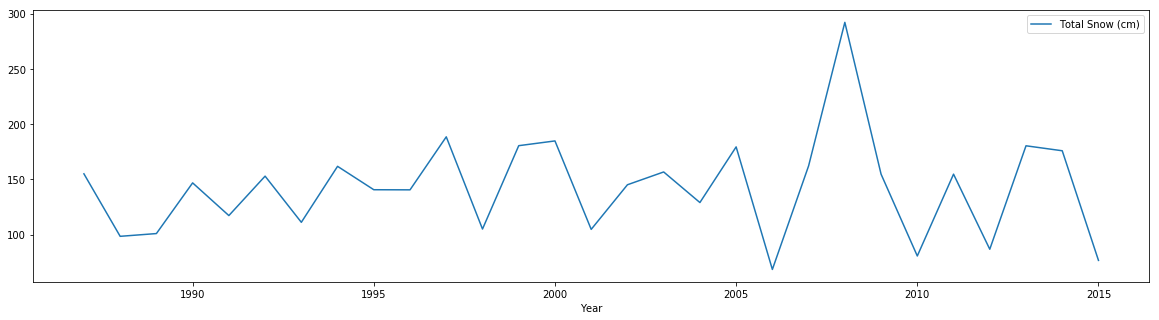

In [140]:
data1=df.groupby('Year')['Total Snow (cm)'].sum().plot(kind='line', legend=True, figsize=(20, 5))

In [141]:
df['max-min']=df['Mean Max Temp (°C)']-df['Mean Min Temp (°C)']

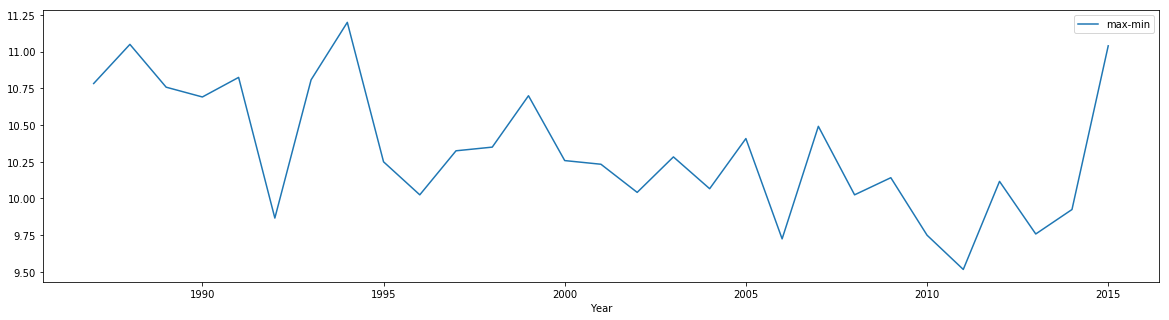

In [142]:
data1=df.groupby('Year')['max-min'].mean().plot(kind='line', legend=True, figsize=(20, 5))

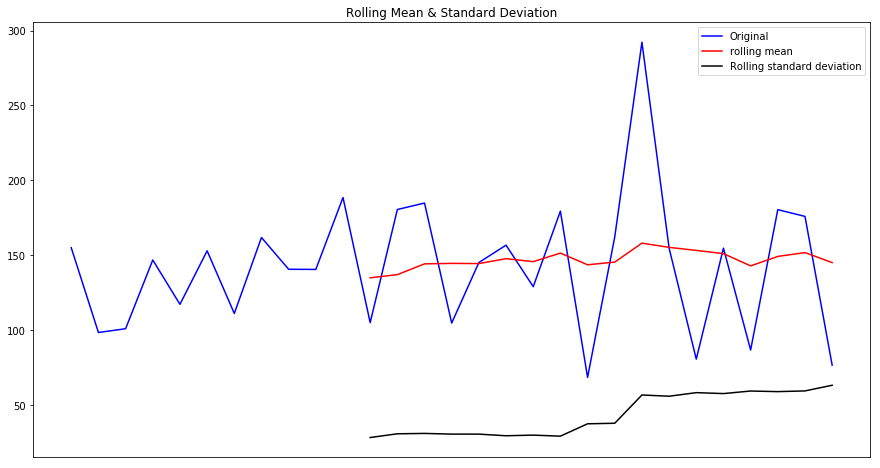

Results of Dickey-Fuller Test:
Test Statistic                 -3.031786
p-value                         0.032031
#Lags Used                      6.000000
Number of Observations Used    22.000000
Critical value (1%)            -3.769733
Critical value (5%)            -3.005426
Critical value (10%)           -2.642501
dtype: float64


In [138]:
test_stationarity(data1)

In [31]:
Victoria_monthdata=df.iloc[:,[0,1,2,3,5,7]]
Victoria_monthdata.isnull().sum()

Date/Time             0
Year                  0
Month                 0
Mean Max Temp (掳C)    8
Mean Min Temp (掳C)    8
Mean Temp (掳C)        8
dtype: int64

In [33]:
Victoria_monthdata=Victoria_monthdata.dropna()

,Date/Time,Year,Month,Mean Max Temp (掳C),Mean Min Temp (掳C),Mean Temp (掳C)
7,1940-08,1940,8,23.4,11.8,17.6
8,1940-09,1940,9,20.9,10.5,15.7
9,1940-10,1940,10,15.6,8.3,12.0
10,1940-11,1940,11,8.4,1.7,5.1
11,1940-12,1940,12,8.8,2.4,5.6


In [92]:
data=Victoria_monthdata.set_index('Date/Time')
data=data.drop(['Year','Month'],axis=1).dropna()


KeyError: "['Year' 'Month'] not found in axis"

In [40]:
import matplotlib.pyplot as plt

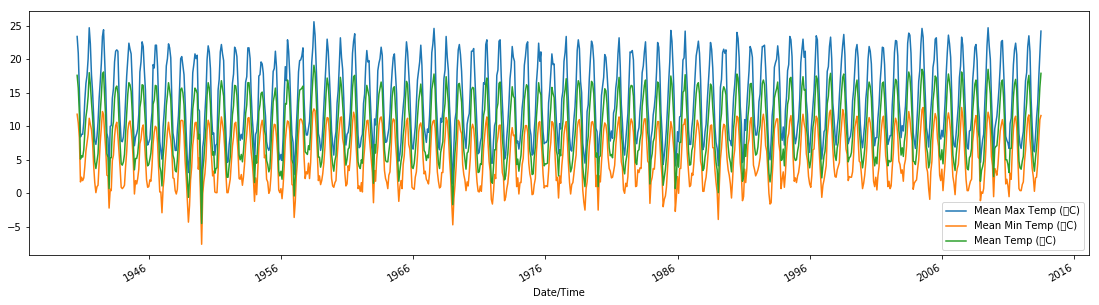

In [91]:
# plt.figure(figsize=(19,5))
# fig, ax = plt.subplots()
# totalSeed = data.index.tolist()
# fig.set_size_inches(15,8)
# xticks=list(range(0,len(totalSeed),24))
# xlabels=[totalSeed[x] for x in xticks]
# xticks.append(len(totalSeed))
# #     xlabels.append(totalSeed[-1])
# ax.set_xticks(xticks)
# ax.set_xticklabels(xlabels, rotation=40)
data.plot(figsize=(19,5))
plt.legend(loc='best')
plt.show()

In [93]:
data.head()

,Mean Max Temp (掳C),Mean Min Temp (掳C),Mean Temp (掳C)
Date/Time,,,
1940-08-01,23.4,11.8,17.6
1940-09-01,20.9,10.5,15.7
1940-10-01,15.6,8.3,12.0
1940-11-01,8.4,1.7,5.1
1940-12-01,8.8,2.4,5.6


In [62]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
def test_stationarity(timeseries):
    
    #这里以一年为一个窗口，每一个时间t的值由它前面12个月（包括自己）的均值代替，标准差同理。
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #plot rolling statistics:
    fig, ax = plt.subplots()
    totalSeed = timeseries.index.tolist()
    fig.set_size_inches(15,8)
    xticks=list(range(0,len(totalSeed),24))
    xlabels=[totalSeed[x] for x in xticks]
    xticks.append(len(totalSeed))
#     xlabels.append(totalSeed[-1])
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels, rotation=40)
    orig = plt.plot(timeseries, color = 'blue',label='Original')
    mean = plt.plot(rolmean , color = 'red',label = 'rolling mean')
    std = plt.plot(rolstd, color = 'black', label= 'Rolling standard deviation')
    
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    #Dickey-Fuller test:
    
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag = 'AIC')
    #dftest的输出前一项依次为检测值，p值，滞后数，使用的观测数，各个置信度下的临界值
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    
    print(dfoutput)
    


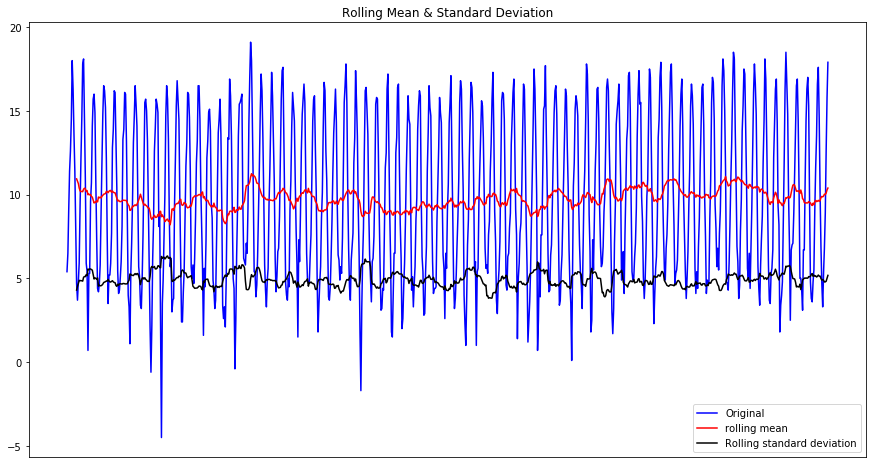

Results of Dickey-Fuller Test:
Test Statistic                  -4.996249
p-value                          0.000023
#Lags Used                      14.000000
Number of Observations Used    855.000000
Critical value (1%)             -3.438021
Critical value (5%)             -2.864926
Critical value (10%)            -2.568573
dtype: float64


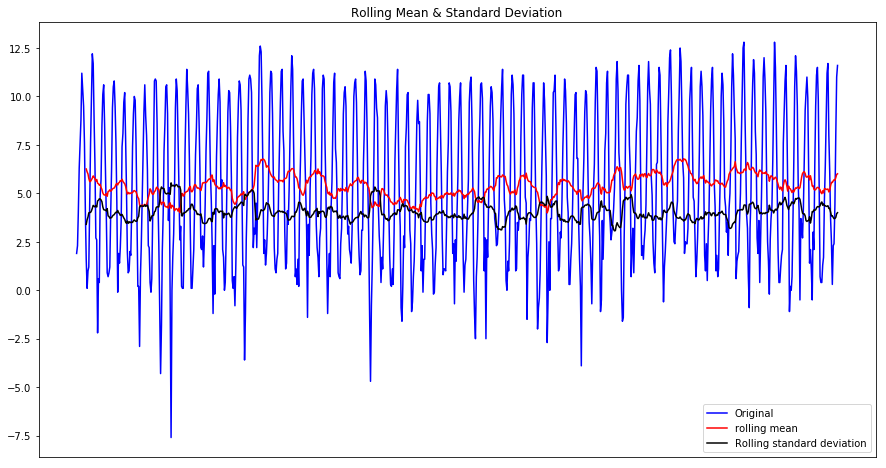

Results of Dickey-Fuller Test:
Test Statistic                  -4.599062
p-value                          0.000130
#Lags Used                      21.000000
Number of Observations Used    848.000000
Critical value (1%)             -3.438085
Critical value (5%)             -2.864954
Critical value (10%)            -2.568588
dtype: float64


In [94]:
ts2 = data.iloc[5:,2]
ts1 = data.iloc[5:,1]
test_stationarity(ts2)
test_stationarity(ts1)

In [128]:
#分解(decomposing) 可以用来把时序数据中的趋势和周期性数据都分离出来:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(timeseries):
    ts_log = np.log(timeseries)
    
    # 返回包含三个部分 trend（趋势部分） ， seasonal（季节性部分） 和residual (残留部分)
    decomposition = seasonal_decompose(timeseries, freq=12)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    plt.figure(figsize=(15,5))
    plt.subplot(411)
    plt.plot(ts_log, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    
    return trend , seasonal, residual

In [71]:
data=data.reset_index()
data['Date/Time']=pd.to_datetime(data['Date/Time'])
data=data.set_index('Date/Time')


,Mean Max Temp (掳C),Mean Min Temp (掳C),Mean Temp (掳C)
Date/Time,,,
1940-08-01,23.4,11.8,17.6
1940-09-01,20.9,10.5,15.7
1940-10-01,15.6,8.3,12.0
1940-11-01,8.4,1.7,5.1
1940-12-01,8.8,2.4,5.6


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


(Date/Time
 1940-08-01          NaN
 1940-09-01          NaN
 1940-10-01          NaN
 1940-11-01          NaN
 1940-12-01          NaN
 1941-01-01          NaN
 1941-02-01    15.720833
 1941-03-01    15.541667
 1941-04-01    15.391667
 1941-05-01    15.508333
 1941-06-01    15.600000
 1941-07-01    15.495833
 1941-08-01    15.345833
 1941-09-01    15.120833
 1941-10-01    14.891667
 1941-11-01    14.758333
 1941-12-01    14.687500
 1942-01-01    14.604167
 1942-02-01    14.637500
 1942-03-01    14.808333
 1942-04-01    14.904167
 1942-05-01    14.808333
 1942-06-01    14.716667
 1942-07-01    14.575000
 1942-08-01    14.479167
 1942-09-01    14.520833
 1942-10-01    14.500000
 1942-11-01    14.458333
 1942-12-01    14.425000
 1943-01-01    14.341667
                 ...    
 2011-02-01    13.658333
 2011-03-01    13.720833
 2011-04-01    13.770833
 2011-05-01    13.758333
 2011-06-01    13.745833
 2011-07-01    13.683333
 2011-08-01    13.712500
 2011-09-01    13.725000
 2011-10-01   

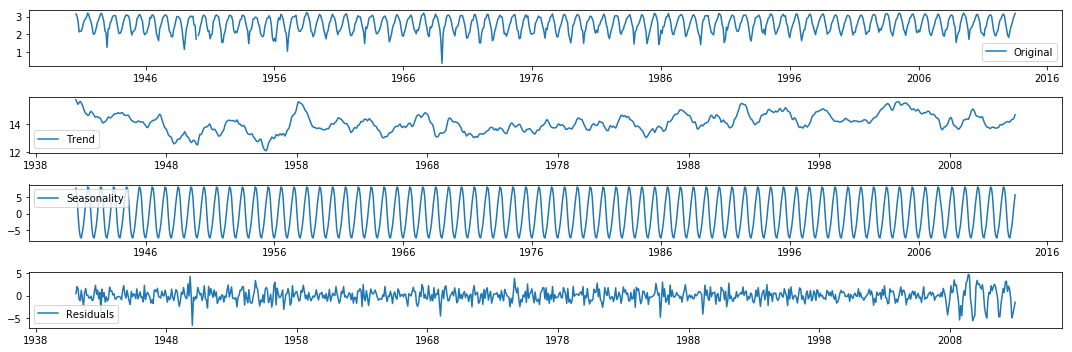

In [133]:
ts2=data['Mean Max Temp (掳C)']
ts1=data['Mean Min Temp (掳C)']
decompose(ts2)


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


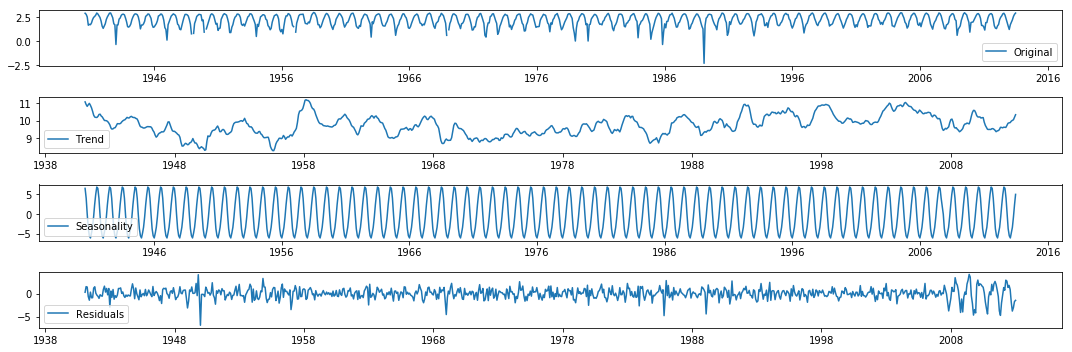

In [134]:
Victorial_mean_team=data['Mean Temp (掳C)']
Victoria_trend , Victoria_seasonal, Victoria_residual=decompose(Victorial_mean_team)

In [139]:
Victorial_mean_team=data['Mean Temp (掳C)']
Victoria_trend , Victoria_seasonal, Victoria_residual=decompose(Victorial_mean_team)
Victoria=pd.DataFrame({'Victoria_trend':Victoria_trend , 'Victoria_seasonal':Victoria_seasonal, 'Victoria_residual':Victoria_residual})
Victoria=Victoria.dropna()
df.date_time.map(lambda x: x.strftime('%Y-%m-%d'))
Victoria.to_excel(r'E:\研究生数学建模\any-data\Victoria_trend.xlsx')

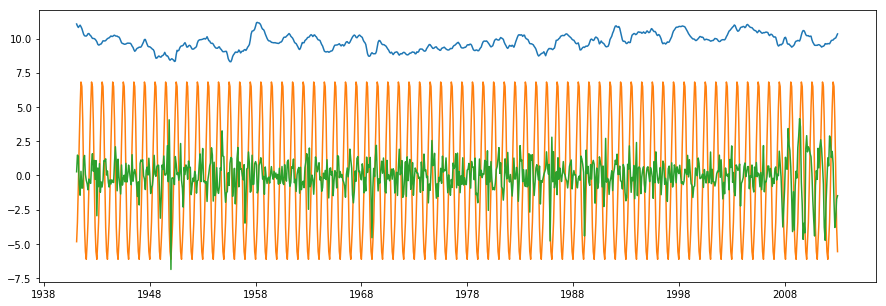

In [152]:
Victoria.index=Victoria.index.map(lambda x: x.strftime('%Y-%m'))

In [154]:
Victoria.to_excel(r'E:\研究生数学建模\any-data\Victoria_trend1.xlsx')

In [148]:
Victoria.to_excel(r'E:\研究生数学建模\any-data\Victoria_trend.xlsx')

In [146]:
from statsmodels.formula.api import ols
curve = ols('Date/Time~Victoria_trend', Victoria).fit()
plt.plot(Victoria['Victoria_trend'], Victoria.index, 'ob')
plt.plot(Victoria['Victoria_trend'], curve.fittedvalues, 'r', linewidth=1)
plt.show()

PatsyError: Error evaluating factor: NameError: name 'Time' is not defined
    Date/Time~Victoria_trend
         ^^^^

In [121]:
YELLOWKNIFE=pd.read_csv(r'E:\研究生数学建模\any-data\YELLOWKNIFE-HENDERSON 1942-2007.csv',engine='python',skiprows=18 )
YELLOWKNIFE_monthdata=YELLOWKNIFE.iloc[:,[0,1,2,3,5,7]]
YELLOWKNIFE_monthdata=YELLOWKNIFE_monthdata.dropna()
YELLOWKNIFE_monthdata.isnull().sum()
YELLOWKNIFE_monthdata['Year']=YELLOWKNIFE_monthdata['Year'].apply(str)
YELLOWKNIFE_monthdata['Month']=YELLOWKNIFE_monthdata['Month'].apply(str)
YELLOWKNIFE_monthdata['Date']=YELLOWKNIFE_monthdata['Year'].str.cat(YELLOWKNIFE_monthdata['Month'],sep='-') 
YELLOWKNIFE_monthdata['Date']=pd.to_datetime(YELLOWKNIFE_monthdata['Date'])
YELLOWKNIFE_data=YELLOWKNIFE_monthdata.set_index('Date')
YELLOWKNIFE_data=YELLOWKNIFE_data.drop(['Date/Time','Year','Month'],axis=1).dropna()
YELLOWKNIFE_data.head() 

,Mean Max Temp (°C),Mean Min Temp (°C),Mean Temp (°C)
Date,,,
1942-07-01,20.9,12.4,16.7
1942-08-01,17.4,9.9,13.7
1942-09-01,10.2,3.8,7.0
1942-10-01,4.3,-1.1,1.6
1942-11-01,-13.2,-20.2,-16.7


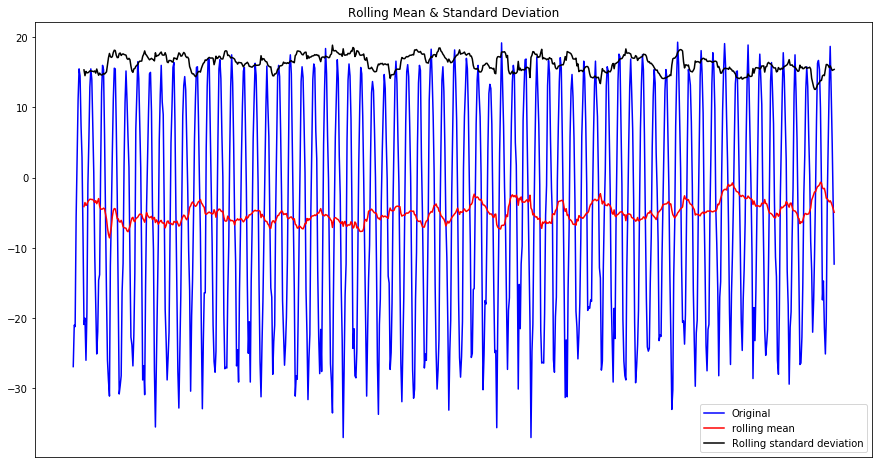

Results of Dickey-Fuller Test:
Test Statistic                -5.793389e+00
p-value                        4.813929e-07
#Lags Used                     1.600000e+01
Number of Observations Used    7.600000e+02
Critical value (1%)           -3.438984e+00
Critical value (5%)           -2.865350e+00
Critical value (10%)          -2.568799e+00
dtype: float64


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


(Date
 1943-01-01         NaN
 1943-02-01         NaN
 1943-03-01         NaN
 1943-04-01         NaN
 1943-05-01         NaN
 1943-06-01         NaN
 1943-07-01   -3.820833
 1943-08-01   -3.741667
 1943-09-01   -3.866667
 1943-10-01   -3.591667
 1943-11-01   -3.308333
 1943-12-01   -3.141667
 1944-01-01   -3.066667
 1944-02-01   -3.087500
 1944-03-01   -3.108333
 1944-04-01   -3.200000
 1944-05-01   -3.416667
 1944-06-01   -3.408333
 1944-07-01   -3.487500
 1944-08-01   -3.529167
 1944-09-01   -3.166667
 1944-10-01   -3.508333
 1944-11-01   -4.237500
 1944-12-01   -4.462500
 1945-01-01   -4.470833
 1945-02-01   -4.391667
 1945-03-01   -4.383333
 1945-04-01   -5.162500
 1945-05-01   -6.508333
 1945-06-01   -7.591667
                 ...   
 2005-05-01   -4.537500
 2005-06-01   -3.733333
 2005-07-01   -2.991667
 2005-08-01   -2.591667
 2005-09-01   -2.200000
 2005-10-01   -2.004167
 2005-11-01   -1.779167
 2005-12-01   -1.416667
 2006-01-01   -1.220833
 2006-02-01   -1.083333
 2006-03-0

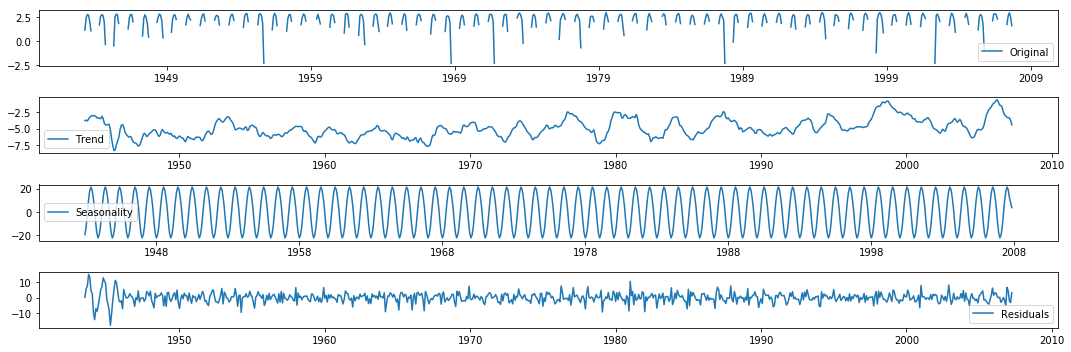

In [122]:
YELLOWKNIFE_ts = YELLOWKNIFE_data.iloc[6:,2]
test_stationarity(YELLOWKNIFE_ts)
decompose(YELLOWKNIFE_ts)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


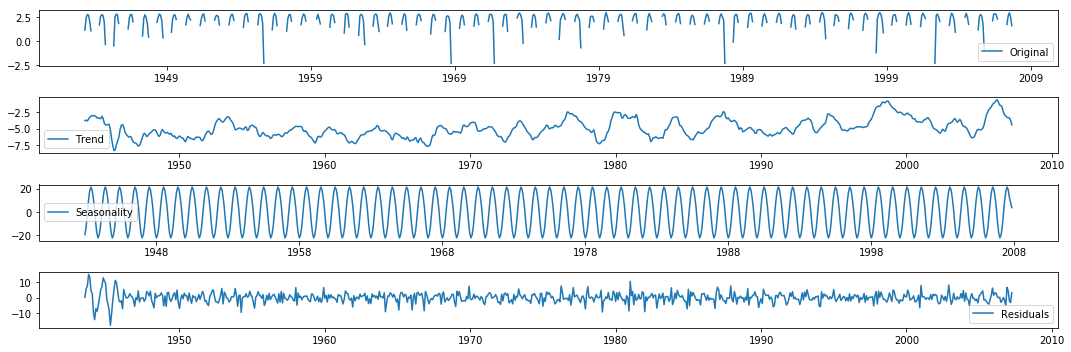

In [155]:
YELLOWKNIFE_ts = YELLOWKNIFE_data.iloc[6:,2]
YELLOWKNIFE_trend , YELLOWKNIFE_seasonal, YELLOWKNIFE_residual=decompose(YELLOWKNIFE_ts)
YELLOWKNIFE=pd.DataFrame({'YELLOWKNIFE_trend':YELLOWKNIFE_trend , 'YELLOWKNIFE_seasonal':YELLOWKNIFE_seasonal, 'YELLOWKNIFE_residual':YELLOWKNIFE_residual})
YELLOWKNIFE=YELLOWKNIFE.dropna()
YELLOWKNIFE.index=YELLOWKNIFE.index.map(lambda x: x.strftime('%Y-%m'))
YELLOWKNIFE.to_excel(r'E:\研究生数学建模\any-data\YELLOWKNIFE_trend.xlsx')

In [123]:
Charlottetown=pd.read_csv(r'E:\研究生数学建模\any-data\TORONTO-monthly-011986-052015.csv',engine='python',skiprows=18 )
Charlottetown_monthdata=Charlottetown.iloc[:,[0,1,2,3,5,7]]
Charlottetown_monthdata=Charlottetown_monthdata.dropna()
Charlottetown_monthdata.isnull().sum()
Charlottetown_monthdata['Year']=Charlottetown_monthdata['Year'].apply(str)
Charlottetown_monthdata['Month']=Charlottetown_monthdata['Month'].apply(str)
Charlottetown_monthdata['Date']=Charlottetown_monthdata['Year'].str.cat(Charlottetown_monthdata['Month'],sep='-') 
Charlottetown_monthdata['Date']=pd.to_datetime(Charlottetown_monthdata['Date'])
Charlottetown_data=Charlottetown_monthdata.set_index('Date')
Charlottetown_data=Charlottetown_data.drop(['Date/Time','Year','Month'],axis=1).dropna()
Charlottetown_data.head() 

,Mean Max Temp (～C),Mean Min Temp (～C),Mean Temp (～C)
Date,,,
1873-01-01,-3.2,-12.6,-7.9
1873-02-01,-5.2,-15.1,-10.2
1873-03-01,1.6,-6.1,-2.3
1873-04-01,6.0,-1.4,2.3
1873-05-01,12.9,3.2,8.1


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


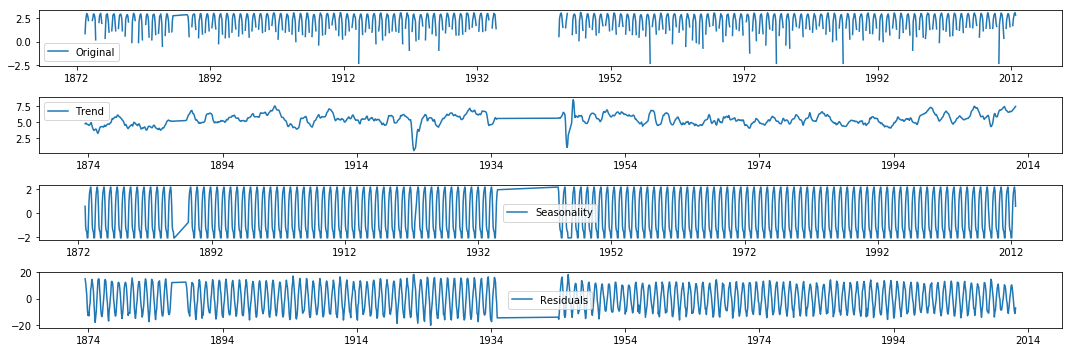

In [156]:
Charlottetown_ts = Charlottetown_data.iloc[:,2]
Charlottetown_trend , Charlottetown_seasonal, Charlottetown_residual=decompose(Charlottetown_ts)
Charlottetown=pd.DataFrame({'Charlottetown_trend':Charlottetown_trend , 'Charlottetown_seasonal':Charlottetown_seasonal, 'Charlottetown_residual':Charlottetown_residual})
Charlottetown=Charlottetown.dropna()
Charlottetown.index=Charlottetown.index.map(lambda x: x.strftime('%Y-%m'))
Charlottetown.to_excel(r'E:\研究生数学建模\any-data\Charlottetown_trend.xlsx')

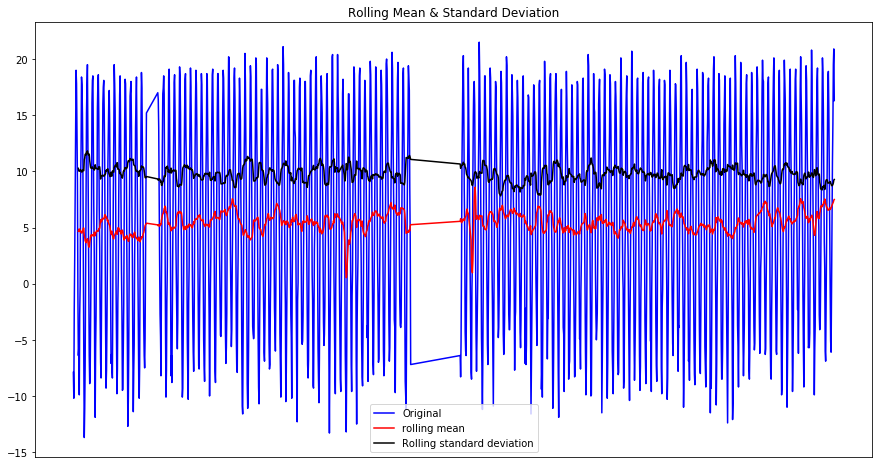

Results of Dickey-Fuller Test:
Test Statistic                -6.690560e+00
p-value                        4.119917e-09
#Lags Used                     2.100000e+01
Number of Observations Used    1.515000e+03
Critical value (1%)           -3.434674e+00
Critical value (5%)           -2.863450e+00
Critical value (10%)          -2.567787e+00
dtype: float64


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


(Date
 1873-01-01         NaN
 1873-02-01         NaN
 1873-03-01         NaN
 1873-04-01         NaN
 1873-05-01         NaN
 1873-06-01         NaN
 1873-07-01    4.750000
 1873-08-01    4.854167
 1873-09-01    4.845833
 1873-10-01    4.720833
 1873-11-01    4.666667
 1873-12-01    4.641667
 1874-01-01    4.541667
 1874-02-01    4.512500
 1874-03-01    4.570833
 1874-04-01    4.700000
 1874-05-01    4.858333
 1874-06-01    4.945833
 1874-07-01    4.608333
 1874-08-01    4.225000
 1874-09-01    3.987500
 1874-10-01    3.800000
 1874-11-01    3.725000
 1874-12-01    3.783333
 1875-01-01    3.887500
 1875-02-01    3.933333
 1875-03-01    3.900000
 1875-04-01    3.629167
 1875-05-01    3.362500
 1875-06-01    3.262500
                 ...   
 2010-04-01    7.208333
 2010-05-01    7.241667
 2010-06-01    7.366667
 2010-07-01    7.462500
 2010-08-01    7.250000
 2010-09-01    7.029167
 2010-10-01    6.866667
 2010-11-01    6.795833
 2010-12-01    6.741667
 2011-01-01    6.612500
 2011-02-0

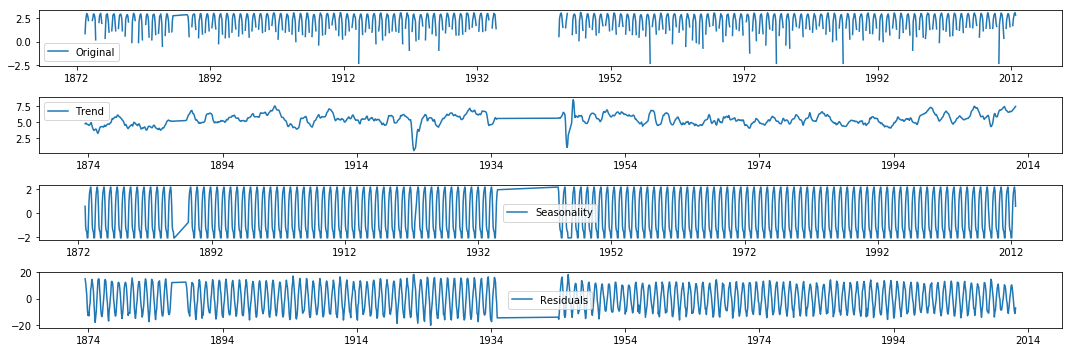

In [124]:
Charlottetown_ts = Charlottetown_data.iloc[:,2]
test_stationarity(Charlottetown_ts)
decompose(Charlottetown_ts)

In [125]:
TORONTO=pd.read_csv(r'E:\研究生数学建模\any-data\TORONTO-monthly-011986-052015.csv',engine='python',skiprows=18 )
TORONTO_monthdata=TORONTO.iloc[:,[0,1,2,3,5,7]]
TORONTO_monthdata=TORONTO_monthdata.dropna()
TORONTO_monthdata.isnull().sum()
TORONTO_monthdata['Year']=TORONTO_monthdata['Year'].apply(str)
TORONTO_monthdata['Month']=TORONTO_monthdata['Month'].apply(str)
TORONTO_monthdata['Date']=TORONTO_monthdata['Year'].str.cat(TORONTO_monthdata['Month'],sep='-') 
TORONTO_monthdata['Date']=pd.to_datetime(TORONTO_monthdata['Date'])
TORONTO_data=TORONTO_monthdata.set_index('Date')
TORONTO_data=TORONTO_data.drop(['Date/Time','Year','Month'],axis=1).dropna()
TORONTO_data.head() 

,Mean Max Temp (°C),Mean Min Temp (°C),Mean Temp (°C)
Date,,,
1987-01-01,-1.4,-9.8,-5.6
1987-02-01,-1.4,-12.6,-7.0
1987-03-01,6.9,-4.2,1.4
1987-04-01,14.2,3.0,8.6
1987-05-01,21.0,7.4,14.2


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


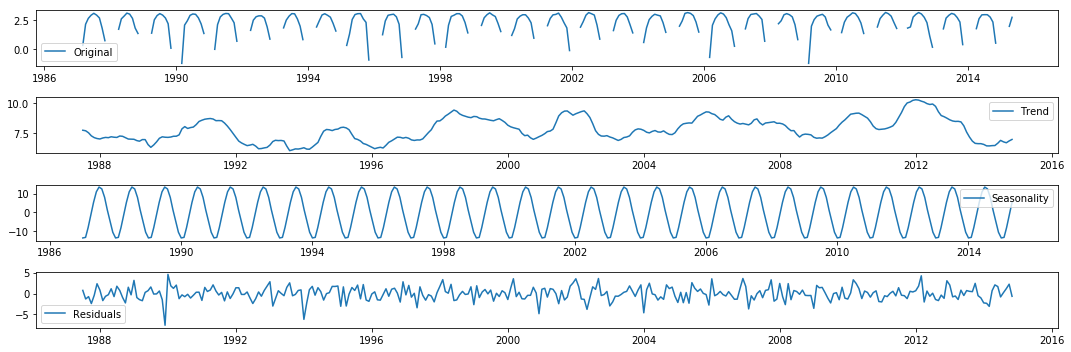

In [157]:
TORONTO_ts = TORONTO_data.iloc[:,2]
TORONTO_trend , TORONTO_seasonal, TORONTO_residual=decompose(TORONTO_ts)
TORONTO=pd.DataFrame({'TORONTO_trend':TORONTO_trend , 'TORONTO_seasonal':TORONTO_seasonal, 'TORONTO_residual':TORONTO_residual})
TORONTO=TORONTO.dropna()
TORONTO.index=TORONTO.index.map(lambda x: x.strftime('%Y-%m'))
TORONTO.to_excel(r'E:\研究生数学建模\any-data\TORONTO_trend.xlsx')

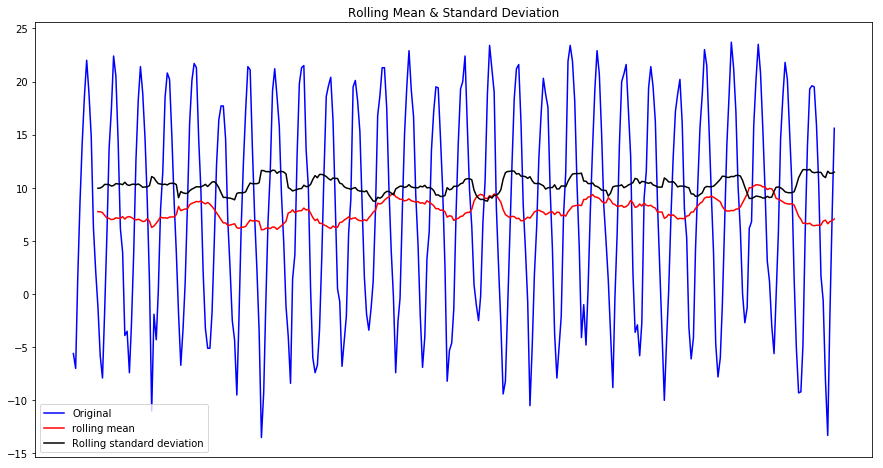

Results of Dickey-Fuller Test:
Test Statistic                  -4.550597
p-value                          0.000159
#Lags Used                      17.000000
Number of Observations Used    323.000000
Critical value (1%)             -3.450759
Critical value (5%)             -2.870530
Critical value (10%)            -2.571560
dtype: float64


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


(Date
 1987-01-01         NaN
 1987-02-01         NaN
 1987-03-01         NaN
 1987-04-01         NaN
 1987-05-01         NaN
 1987-06-01         NaN
 1987-07-01    7.750000
 1987-08-01    7.704167
 1987-09-01    7.537500
 1987-10-01    7.283333
 1987-11-01    7.137500
 1987-12-01    7.062500
 1988-01-01    7.025000
 1988-02-01    7.108333
 1988-03-01    7.154167
 1988-04-01    7.133333
 1988-05-01    7.208333
 1988-06-01    7.170833
 1988-07-01    7.154167
 1988-08-01    7.270833
 1988-09-01    7.245833
 1988-10-01    7.133333
 1988-11-01    7.020833
 1988-12-01    7.008333
 1989-01-01    7.000000
 1989-02-01    6.891667
 1989-03-01    6.841667
 1989-04-01    6.975000
 1989-05-01    6.975000
 1989-06-01    6.562500
                 ...   
 2012-12-01    8.750000
 2013-01-01    8.612500
 2013-02-01    8.516667
 2013-03-01    8.479167
 2013-04-01    8.487500
 2013-05-01    8.441667
 2013-06-01    8.116667
 2013-07-01    7.595833
 2013-08-01    7.183333
 2013-09-01    6.845833
 2013-10-0

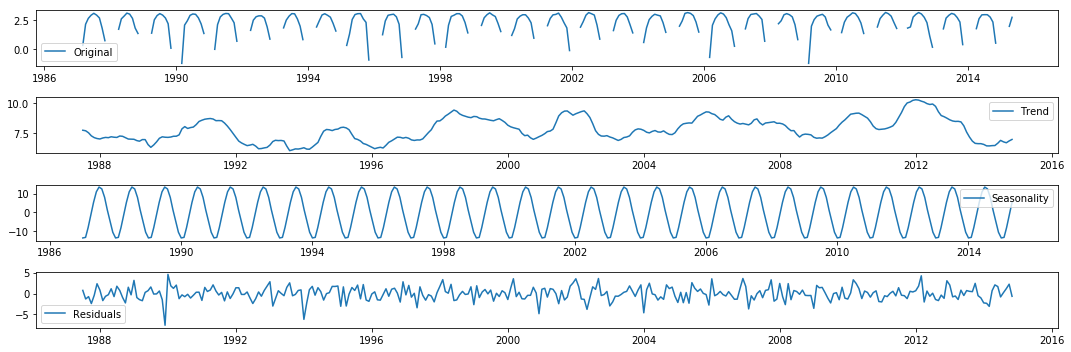

In [127]:
TORONTO_ts = TORONTO_data.iloc[:,2]
test_stationarity(TORONTO_ts)
decompose(TORONTO_ts)

In [128]:
TORONTO_ts

Date
1987-01-01    -5.6
1987-02-01    -7.0
1987-03-01     1.4
1987-04-01     8.6
1987-05-01    14.2
1987-06-01    18.7
1987-07-01    22.0
1987-08-01    18.9
1987-09-01    14.8
1987-10-01     6.2
1987-11-01     2.1
1987-12-01    -1.2
1988-01-01    -5.8
1988-02-01    -7.9
1988-03-01    -1.7
1988-04-01     5.6
1988-05-01    13.7
1988-06-01    17.4
1988-07-01    22.4
1988-08-01    20.5
1988-09-01    14.3
1988-10-01     6.2
1988-11-01     3.9
1988-12-01    -3.9
1989-01-01    -3.5
1989-02-01    -7.4
1989-03-01    -2.8
1989-04-01     4.0
1989-05-01    12.6
1989-06-01    18.2
              ... 
2012-12-01     1.2
2013-01-01    -3.0
2013-02-01    -5.6
2013-03-01    -0.3
2013-04-01     5.8
2013-05-01    14.6
2013-06-01    18.6
2013-07-01    21.8
2013-08-01    20.2
2013-09-01    15.3
2013-10-01    10.4
2013-11-01     1.5
2013-12-01    -5.0
2014-01-01    -9.3
2014-02-01    -9.2
2014-03-01    -4.8
2014-04-01     5.9
2014-05-01    13.9
2014-06-01    19.3
2014-07-01    19.6
2014-08-01    19.5
2014-09

In [131]:
WINNIPEG=pd.read_csv(r'E:\研究生数学建模\any-data\WINNIPEG-monthly-011938-112007.csv',engine='python',skiprows=18 )
WINNIPEG_monthdata=WINNIPEG.iloc[:,[0,1,2,3,5,7]]
WINNIPEG_monthdata=WINNIPEG_monthdata.dropna()
WINNIPEG_monthdata.isnull().sum()
WINNIPEG_monthdata['Year']=WINNIPEG_monthdata['Year'].apply(str)
WINNIPEG_monthdata['Month']=WINNIPEG_monthdata['Month'].apply(str)
WINNIPEG_monthdata['Date']=WINNIPEG_monthdata['Year'].str.cat(WINNIPEG_monthdata['Month'],sep='-') 
WINNIPEG_monthdata['Date']=pd.to_datetime(WINNIPEG_monthdata['Date'])
WINNIPEG_data=WINNIPEG_monthdata.set_index('Date')
WINNIPEG_data=WINNIPEG_data.drop(['Date/Time','Year','Month'],axis=1).dropna()
WINNIPEG_data.head() 

,Mean Max Temp (°C),Mean Min Temp (°C),Mean Temp (°C)
Date,,,
1939-01-01,-10.3,-20.4,-15.4
1939-02-01,-17.7,-27.8,-22.8
1939-03-01,-4.7,-15.2,-10.0
1939-04-01,9.1,-3.6,2.8
1939-05-01,19.8,6.4,13.1


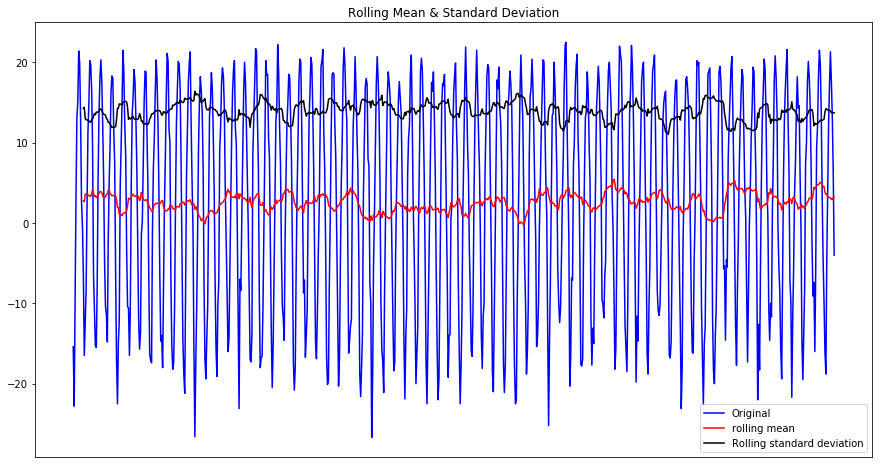

Results of Dickey-Fuller Test:
Test Statistic                -6.290311e+00
p-value                        3.612822e-08
#Lags Used                     2.100000e+01
Number of Observations Used    8.050000e+02
Critical value (1%)           -3.438499e+00
Critical value (5%)           -2.865137e+00
Critical value (10%)          -2.568685e+00
dtype: float64


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


(Date
 1939-01-01         NaN
 1939-02-01         NaN
 1939-03-01         NaN
 1939-04-01         NaN
 1939-05-01         NaN
 1939-06-01         NaN
 1939-07-01    2.704167
 1939-08-01    3.087500
 1939-09-01    3.583333
 1939-10-01    3.629167
 1939-11-01    3.533333
 1939-12-01    3.454167
 1940-01-01    3.400000
 1940-02-01    3.341667
 1940-03-01    3.487500
 1940-04-01    3.916667
 1940-05-01    3.941667
 1940-06-01    3.504167
 1940-07-01    3.366667
 1940-08-01    3.291667
 1940-09-01    3.179167
 1940-10-01    3.329167
 1940-11-01    3.562500
 1940-12-01    3.783333
 1941-01-01    3.912500
 1941-02-01    3.833333
 1941-03-01    3.562500
 1941-04-01    3.220833
 1941-05-01    3.141667
 1941-06-01    3.229167
                 ...   
 2005-06-01    3.200000
 2005-07-01    3.929167
 2005-08-01    4.337500
 2005-09-01    4.325000
 2005-10-01    4.491667
 2005-11-01    4.658333
 2005-12-01    4.766667
 2006-01-01    4.850000
 2006-02-01    4.983333
 2006-03-01    5.025000
 2006-04-0

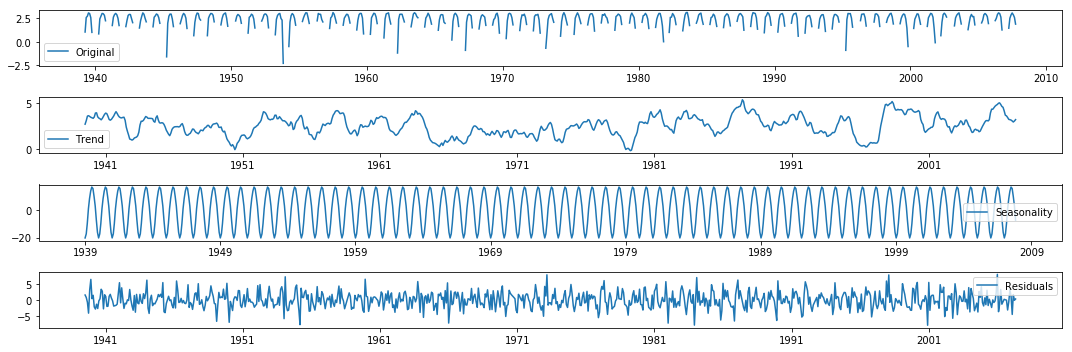

In [132]:
WINNIPEG_ts = WINNIPEG_data.iloc[:,2]
test_stationarity(WINNIPEG_ts)
decompose(WINNIPEG_ts)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


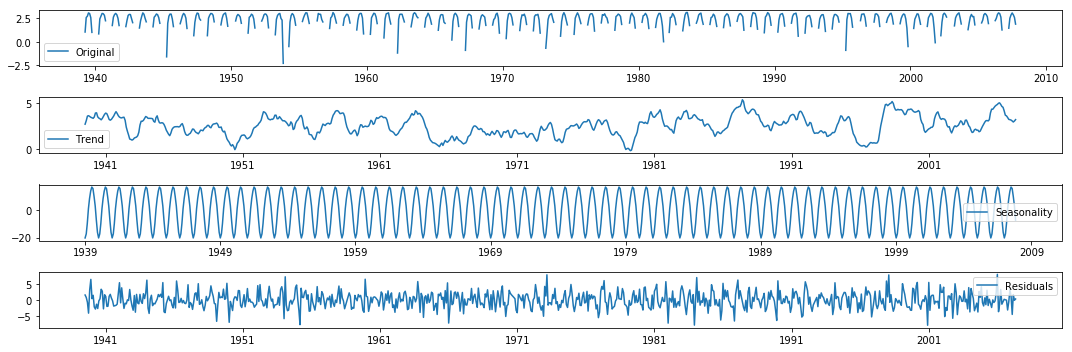

In [158]:
WINNIPEG_ts = WINNIPEG_data.iloc[:,2]
WINNIPEG_trend , WINNIPEG_seasonal, WINNIPEG_residual=decompose(WINNIPEG_ts)
WINNIPEG=pd.DataFrame({'WINNIPEG_trend':WINNIPEG_trend , 'WINNIPEG_seasonal':WINNIPEG_seasonal, 'WINNIPEG_residual':WINNIPEG_residual})
WINNIPEG=WINNIPEG.dropna()
WINNIPEG.index=WINNIPEG.index.map(lambda x: x.strftime('%Y-%m'))
WINNIPEG.to_excel(r'E:\研究生数学建模\any-data\WINNIPEG_trend.xlsx')